In [1]:
# import relevant modules
import matplotlib
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Varadharajan R\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Varadharajan R\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Varadharajan R\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
#load the train and test features of the images for resnet18 and densenet121 models
train = pd.read_csv("C:/Users/Varadharajan R/Desktop/FYP/densenet121_size224_train.csv")
test = pd.read_csv("C:/Users/Varadharajan R/Desktop/FYP/densenet121_size224_test.csv")

df=pd.DataFrame(train.append(test))

In [5]:
#train and test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

train

PIXEL_0   PIXEL_1   PIXEL_2   PIXEL_3   PIXEL_4   PIXEL_5   PIXEL_6  \
1211  0.000214  0.010246 -0.001141  0.001641  0.054829  0.776685  0.001157   
36   -0.000078 -0.000920  0.001307  0.001496 -0.119035  0.334357 -0.000212   
3206 -0.000137  0.002092  0.000698  0.002890 -0.122374  0.349498  0.000431   
5701  0.000151 -0.003552  0.000046  0.003605 -0.125964  0.575410  0.000647   
1047 -0.000010  0.000670  0.001419  0.002510 -0.178670  0.089564  0.000077   
...        ...       ...       ...       ...       ...       ...       ...   
614   0.000008  0.001780  0.000743  0.001348 -0.201575  0.063777  0.000061   
2842  0.000297 -0.002692  0.001559  0.001650 -0.011157  0.094720 -0.000002   
1422  0.000247  0.002650  0.000027  0.001841 -0.014689 -0.449311 -0.000052   
2692  0.000430  0.004786  0.001700  0.001683  0.042516  0.091988  0.000461   
2888  0.000375  0.001002 -0.000125  0.001828 -0.038279  0.163444  0.000483   

       PIXEL_7   PIXEL_8   PIXEL_9  PIXEL_10  PIXEL_11  PIXEL_12  PIXEL_13  \
1211  0.001934 -0.462883 -0.000029 -0.000914  0.016759  0.000565  0.034392   
36    0.003159 -0.375566 -0.000066 -0.002226  0.023219 -0.000542  0.086785   
3206  0.005807 -0.274075 -0.000129  0.002501  0.016735  0.000812  0.022058   
5701  0.002973 -0.245102  0.000002  0.003226  0.016360  0.000088  0.025402   
1047  0.002720 -0.283591 -0.000030 -0.001739  0.023621  0.000020  0.055829   
...        ...       ...       ...       ...       ...       ...       ...   
614   0.002627 -0.216318 -0.000240 -0.003550  0.015963 -0.000813  0.042759   
2842  0.002632 -0.596226 -0.000423 -0.000601  0.021649  0.000819  0.030655   
1422 -0.001149 -0.407885 -0.000009 -0.004780  0.027731 -0.001310  0.016017   
2692 -0.000882 -0.421248 -0.000071 -0.003605  0.027436 -0.000378  0.031696   
2888  0.001459 -0.348030 -0.000048  0.000582  0.020595  0.000216  0.030182   

      PIXEL_14  PIXEL_15  PIXEL_16  PIXEL_17  PIXEL_18  PIXEL_19  PIXEL_20  \
1211 -0.012562  0.000044 -0.000501  0.664663  0.002690  0.000888  0.003243   
36    0.012317 -0.000003 -0.002577  1.373110  0.001604  0.000240  0.001727   
3206 -0.001570 -0.000034 -0.001959  1.301467  0.002889  0.000162  0.003210   
5701 -0.003618 -0.000018 -0.001188  1.493083  0.003113  0.000193  0.003200   
1047  0.008777  0.000084 -0.002772  1.358716  0.003036  0.000175  0.002554   
...        ...       ...       ...       ...       ...       ...       ...   
614   0.002894 -0.000145 -0.003007  1.343408  0.003231  0.000029  0.002131   
2842  0.001437 -0.000026 -0.000760  1.071330  0.002063  0.000333  0.000731   
1422 -0.000992 -0.000015 -0.000464  1.263885  0.002287  0.000313  0.001725   
2692  0.006416  0.000037 -0.000840  1.373802  0.002888  0.000467  0.002252   
2888  0.009660 -0.000030 -0.000151  0.958079  0.002034  0.000329  0.002859   

      PIXEL_21  PIXEL_22  PIXEL_23  PIXEL_24  PIXEL_25  PIXEL_26  PIXEL_27  \
1211  0.004170  0.000448  0.000423  0.001276  0.000217  0.001804 -0.008568   
36    0.005628 -0.000080  0.002194 -0.000720  0.000906  0.001744  0.000360   
3206  0.006806  0.000167  0.000840  0.000654  0.000403  0.001556 -0.011666   
5701  0.007838  0.000175  0.001280 -0.000060  0.001741  0.000831  0.013059   
1047  0.008726  0.000209  0.001199  0.000872  0.000825  0.001822  0.013309   
...        ...       ...       ...       ...       ...       ...       ...   
614   0.004852 -0.000019  0.001367  0.000598 -0.000212  0.000889  0.034673   
2842  0.006545 -0.000213  0.000561 -0.000127 -0.000130  0.002300 -0.005892   
1422  0.007823  0.000067  0.000797  0.001016 -0.000118  0.002602  0.017818   
2692  0.006440  0.000079  0.000874  0.000435 -0.000314  0.001523  0.028605   
2888  0.007185 -0.000086  0.001283  0.000440  0.001375  0.001791  0.015576   

      PIXEL_28  PIXEL_29  PIXEL_30  PIXEL_31  PIXEL_32  PIXEL_33  PIXEL_34  \
1211  0.004631 -0.000318 -0.016750 -0.002350  0.005273  0.000106  0.032175   
36    0.004294  0.002760 -0.012178  0.001655 -0.002929 -0.000297 -0.116016   
3206  0.008653  0.000396 

In [6]:
test

PIXEL_0   PIXEL_1   PIXEL_2   PIXEL_3   PIXEL_4   PIXEL_5   PIXEL_6  \
2628  0.000178  0.002079  0.002273  0.001933 -0.111968  0.163451  0.000398   
996  -0.000151  0.000645  0.001625  0.002436 -0.136425  0.158376  0.000082   
4317 -0.000340  0.000755  0.002308 -0.000466 -0.078822 -0.014042 -0.000011   
546  -0.000189  0.000851  0.000390  0.001347 -0.161155  0.134526 -0.000126   
5896 -0.000417  0.000573 -0.000481  0.002044 -0.217460  0.435890  0.000340   
...        ...       ...       ...       ...       ...       ...       ...   
4131  0.000038 -0.001011 -0.000321  0.001146 -0.153625  0.136046  0.000316   
1500 -0.000105  0.001004  0.000573  0.000660 -0.169188  0.464148  0.000437   
600  -0.000049 -0.000068 -0.000191  0.001953 -0.203153  0.220552  0.000023   
2719  0.000072 -0.000959  0.000289  0.001696 -0.151686  0.648517  0.000090   
1230  0.000455  0.004407  0.001299  0.002241  0.002186  0.439365  0.000439   

       PIXEL_7   PIXEL_8       PIXEL_9  PIXEL_10  PIXEL_11  PIXEL_12  \
2628  0.001288 -0.216723 -1.683528e-05 -0.006198  0.015500 -0.000914   
996   0.001711 -0.255014 -3.405253e-05 -0.002298  0.016204 -0.000833   
4317  0.005687 -0.246352 -2.434004e-04 -0.007340  0.028580 -0.000676   
546   0.003346 -0.247543 -2.499113e-04 -0.001971  0.018709 -0.000748   
5896  0.002966 -0.138184  3.137350e-05  0.000116  0.018737  0.000302   
...        ...       ...           ...       ...       ...       ...   
4131  0.002456 -0.303295 -1.294645e-04 -0.000474  0.014630  0.000056   
1500  0.004000 -0.256484 -1.181946e-04 -0.002857  0.024525  0.000043   
600   0.001552 -0.245421  2.408486e-05 -0.002679  0.029004 -0.000663   
2719  0.004484 -0.380028 -6.899555e-05  0.002462  0.018008  0.000343   
1230  0.000442 -0.524626 -8.229375e-07 -0.003568  0.023604 -0.000738   

      PIXEL_13  PIXEL_14  PIXEL_15  PIXEL_16  PIXEL_17  PIXEL_18  PIXEL_19  \
2628  0.051857  0.020870 -0.000102 -0.002273  1.281863  0.003709  0.000196   
996   0.045787  0.029917 -0.000006 -0.002959  1.170975  0.003049  0.000188   
4317  0.061214 -0.008940 -0.000103 -0.001748  0.984649  0.002427  0.000384   
546   0.040778  0.013505 -0.000111 -0.002961  1.162364  0.002782  0.000109   
5896  0.045424 -0.004331 -0.000022 -0.001964  1.307489  0.002127  0.000233   
...        ...       ...       ...       ...       ...       ...       ...   
4131  0.087233  0.007087  0.000076 -0.003400  1.239204  0.002339  0.000134   
1500  0.076488 -0.006599 -0.000032 -0.001799  1.026234  0.002970  0.000370   
600   0.063370  0.022142 -0.000030 -0.002545  1.492595  0.002892  0.000169   
2719  0.065233  0.022417  0.000117 -0.002694  1.204908  0.002697  0.000085   
1230  0.040144  0.006339 -0.000040 -0.000928  0.763256  0.003529  0.000339   

      PIXEL_20  PIXEL_21  PIXEL_22  PIXEL_23  PIXEL_24  PIXEL_25  PIXEL_26  \
2628  0.003468  0.004505  0.000140  0.001578  0.001647  0.000325  0.001668   
996   0.001434  0.006928  0.000354  0.001676  0.000284  0.000455  0.002288   
4317  0.001653  0.002196 -0.000416  0.001911  0.001738 -0.000259  0.002341   
546   0.002985  0.004837 -0.000330  0.001527  0.000823  0.000151  0.000894   
5896  0.003422  0.006025 -0.000003  0.001179  0.001462 -0.000446 -0.000122   
...        ...       ...       ...       ...       ...       ...       ...   
4131  0.003492  0.002439 -0.000036  0.001633 -0.000277 -0.000175  0.001013   
1500  0.004588  0.003645  0.000019  0.002027 -0.000206  0.001104  0.000225   
600   0.002952  0.006165  0.000343  0.001495  0.000168  0.000315  0.000944   
2719  0.003378  0.006165  0.000109  0.001760 -0.000041  0.000295  0.002019   
1230  0.004139  0.005701  0.000399  0.001830  0.001172  0.000593  0.002345   

      PIXEL_27  PIXEL_28  PIXEL_29  PIXEL_30  PIXEL_31  PIXEL_32  PIXEL_33  \
2628  0.021326  0.009940 -0.000944 -0.010054 -0.000415 -0.005847 -0.000487   
996   0.011289  0.004643  0.003241 -0.006846 -0.000710  0.018227 -0.000560   
4317  0.021098  0.011034  0.001832 -0.007794  0.000397  0.010057  0.000255   
546   0.019648  0.0

In [7]:
# Descriptive statistics
train.describe()

PIXEL_0      PIXEL_1       PIXEL_2      PIXEL_3      PIXEL_4  \
count  5403.000000  5403.000000  5.403000e+03  5403.000000  5403.000000   
mean      0.000070     0.000885  8.200269e-04     0.001827    -0.123550   
std       0.000225     0.002815  1.189807e-03     0.000784     0.075259   
min      -0.000579    -0.008774 -2.919717e-03    -0.001543    -0.291834   
25%      -0.000083    -0.000977 -6.102918e-07     0.001321    -0.177160   
50%       0.000026     0.000685  7.706705e-04     0.001768    -0.144523   
75%       0.000183     0.002618  1.588525e-03     0.002305    -0.089617   
max       0.000876     0.012437  4.593776e-03     0.004720     0.147145   

           PIXEL_5      PIXEL_6      PIXEL_7      PIXEL_8      PIXEL_9  \
count  5403.000000  5403.000000  5403.000000  5403.000000  5403.000000   
mean      0.291630     0.000254     0.002503    -0.267119    -0.000081   
std       0.323076     0.000326     0.001618     0.094423     0.000153   
min      -0.767778    -0.001057    -0.002980    -0.635915    -0.000691   
25%       0.081337     0.000039     0.001352    -0.321689    -0.000188   
50%       0.254179     0.000259     0.002481    -0.258299    -0.000078   
75%       0.467501     0.000451     0.003664    -0.205551     0.000027   
max       1.936117     0.001620     0.007346     0.144973     0.000444   

          PIXEL_10     PIXEL_11     PIXEL_12     PIXEL_13     PIXEL_14  \
count  5403.000000  5403.000000  5403.000000  5403.000000  5403.000000   
mean     -0.001586     0.020656    -0.000291     0.046652     0.007088   
std       0.003035     0.005994     0.000657     0.019117     0.014749   
min      -0.009976    -0.015494    -0.002754    -0.027969    -0.070494   
25%      -0.003821     0.016671    -0.000748     0.034199    -0.002247   
50%      -0.001888     0.020707    -0.000300     0.046401     0.008116   
75%       0.000574     0.024746     0.000161     0.058599     0.017387   
max       0.008457     0.044519     0.001745     0.141460     0.050280   

          PIXEL_15     PIXEL_16     PIXEL_17     PIXEL_18     PIXEL_19  \
count  5403.000000  5403.000000  5403.000000  5403.000000  5403.000000   
mean     -0.000042    -0.001845     1.229830     0.002665     0.000221   
std       0.000075     0.001003     0.238306     0.000924     0.000138   
min      -0.000273    -0.003930     0.337192    -0.000143    -0.000204   
25%      -0.000095    -0.002551     1.085091     0.002043     0.000122   
50%      -0.000046    -0.002064     1.236538     0.002678     0.000195   
75%       0.000010    -0.001397     1.387351     0.003271     0.000304   
max       0.000230     0.001383     2.138745     0.006676     0.000917   

          PIXEL_20     PIXEL_21     PIXEL_22     PIXEL_23     PIXEL_24  \
count  5403.000000  5403.000000  5403.000000  5403.000000  5403.000000   
mean      0.002821     0.005749     0.000045     0.001425     0.000454   
std       0.001003     0.001494     0.000207     0.000460     0.000782   
min      -0.000946     0.000136    -0.000839    -0.000479    -0.002474   
25%       0.002120     0.004769    -0.000088     0.001116    -0.000061   
50%       0.002811     0.005721     0.000045     0.001433     0.000423   
75%       0.003528     0.006622     0.000180     0.001744     0.000924   
max       0.006079     0.011135     0.000996     0.002951     0.004184   

          PIXEL_25     PIXEL_26     PIXEL_27     PIXEL_28     PIXEL_29  \
count  5403.000000  5403.000000  5403.000000  5403.000000  5403.000000   
mean      0.000342     0.001566     0.012010     0.005512     0.000794   
std       0.000687     0.000728     0.012557     0.004770     0.001410   
min      -0.004457    -0.001865    -0.025176    -0.014899    -0.004153   
25%      -0.000077     0.001084     0.003235     0.002332    -0.000158   
50%       0.000380     0.001558     0.011950     0.005761     0.000833   
75%       0.000807     0.002035     0.020673     0.008711     0.001734   
max       0.002795     0.004098     0.065302     0.023361     0.005986   



In [8]:
#label counts in each of train and test datasets
print(train['label'].value_counts())
print(test['label'].value_counts())

prunus_virginiana         123
prunus_sargentii          116
ulmus_pumila              106
cryptomeria_japonica       97
quercus_muehlenbergii      82
                         ... 
crataegus_crus-galli        9
quercus_phellos             8
quercus_alba                8
tilia_europaea              8
pinus_thunbergii            7
Name: label, Length: 184, dtype: int64
prunus_virginiana          60
prunus_sargentii           52
ulmus_pumila               39
styrax_japonica            37
cryptomeria_japonica       35
                           ..
acer_pseudoplatanus         3
fraxinus_pennsylvanica      2
juglans_nigra               1
prunus_serotina             1
betula_lenta                1
Name: label, Length: 184, dtype: int64


In [9]:
#normalizing the train and test dataset numerical pixel values before classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [10]:
sc_traindf

PIXEL_0   PIXEL_1   PIXEL_2   PIXEL_3   PIXEL_4   PIXEL_5   PIXEL_6  \
0     0.641069  3.325516 -1.647926 -0.237002  2.370419  1.501504  2.772701   
1    -0.657761 -0.641177  0.408989 -0.422481  0.059998  0.132262 -1.430560   
2    -0.922244  0.428898 -0.102578  1.356875  0.015630  0.179132  0.543960   
3     0.359476 -1.576155 -0.650765  2.269786 -0.032087  0.878450  1.204688   
4    -0.356202 -0.076313  0.503700  0.871779 -0.732479 -0.625502 -0.543591   
...        ...       ...       ...       ...       ...       ...       ...   
5398 -0.276693  0.318021 -0.064836 -0.610222 -1.036849 -0.705326 -0.595103   
5399  1.007616 -1.270836  0.621001 -0.225807  1.493551 -0.609541 -0.785700   
5400  0.788730  0.626970 -0.666999  0.018946  1.446614 -2.293607 -0.941376   
5401  1.599167  1.385895  0.739325 -0.182661  2.206803 -0.617999  0.635395   
5402  1.357673  0.041800 -0.794335  0.001501  1.133144 -0.396803  0.701224   

       PIXEL_7   PIXEL_8   PIXEL_9  PIXEL_10  PIXEL_11  PIXEL_12  PIXEL_13  \
0    -0.351267 -2.073455  0.335556  0.221319 -0.650195  1.303355 -0.641328   
1     0.405634 -1.148626  0.098024 -0.210894  0.427648 -0.382202  2.099505   
2     2.041870 -0.073673 -0.317978  1.346555 -0.654244  1.679428 -1.286584   
3     0.290680  0.233200  0.541610  1.585437 -0.716854  0.577192 -1.111653   
4     0.134476 -0.174466  0.329253 -0.050655  0.494723  0.472676  0.480070   
...        ...       ...       ...       ...       ...       ...       ...   
5398  0.076527  0.538068 -1.044079 -0.647429 -0.783083 -0.795344 -0.203636   
5399  0.079790 -3.485781 -2.244829  0.324378  0.165764  1.689860 -0.836826   
5400 -2.257099 -1.490938  0.467772 -1.052659  1.180566 -1.553336 -1.602611   
5401 -2.091933 -1.632475  0.060726 -0.665402  1.131392 -0.132816 -0.782395   
5402 -0.644936 -0.856973  0.214101  0.714275 -0.010183  0.771513 -0.861560   

      PIXEL_14  PIXEL_15  PIXEL_16  PIXEL_17  PIXEL_18  PIXEL_19  PIXEL_20  \
0    -1.332382  1.150548  1.340116 -2.371823  0.026943  4.826921  0.421358   
1     0.354566  0.527347 -0.730044  0.601302 -1.148959  0.136894 -1.090651   
2    -0.587052  0.110960 -0.113655  0.300640  0.242609 -0.424636  0.388560   
3    -0.725934  0.322410  0.654776  1.104789  0.484118 -0.201594  0.378325   
4     0.114519  1.680475 -0.924556  0.540895  0.401372 -0.334903 -0.266077   
...        ...       ...       ...       ...       ...       ...       ...   
5398 -0.284374 -1.385617 -1.159042  0.476649  0.612881 -1.393033 -0.687777   
5399 -0.383172  0.213792  1.082487 -0.665171 -0.652521  0.809555 -2.084096   
5400 -0.547855  0.354719  1.376883  0.142917 -0.409121  0.662966 -1.092611   
5401 -0.045533  1.062541  1.002490  0.604204  0.240694  1.776744 -0.567507   
5402  0.174386  0.153124  1.690002 -1.140452 -0.683674  0.778460  0.038283   

      PIXEL_21  PIXEL_22  PIXEL_23  PIXEL_24  PIXEL_25  PIXEL_26  PIXEL_27  \
0    -1.057142  1.945446 -2.179023  1.051457 -0.182957  0.327068 -1.638877   
1    -0.081434 -0.603940  1.670259 -1.499953  0.820263  0.243865 -0.927877   
2     0.707406  0.587157 -1.272299  0.255938  0.087727 -0.013959 -1.885572   
3     1.398557  0.629254 -0.315614 -0.656577  2.035651 -1.009987  0.083539   
4     1.992824  0.791797 -0.492071  0.534851  0.702409  0.350943  0.103450   
...        ...       ...       ...       ...       ...       ...       ...   
5398 -0.600913 -0.308969 -0.127351  0.184975 -0.807126 -0.929250  1.804900   
5399  0.532531 -1.242486 -1.879572 -0.741781 -0.687687  1.007313 -1.425746   
5400  1.388407  0.105044 -1.367108  0.719539 -0.669527  1.422496  0.462553   
5401  0.462165  0.163452 -1.199968 -0.023891 -0.954876 -0.059618  1.321636   
5402  0.961201 -0.630798 -0.309164 -0.017076  1.501909  0.308471  0.283941   

      PIXEL_28  PIXEL_29  PIXEL_30  PIXEL_31  PIXEL_32  PIXEL_33  PIXEL_34  \
0    -0.184631 -0.789096 -0.188587 -1.266389 -0.362563  2.044081 -0.290664   
1    -0.255168  1.394091  0.753254  1.014357 -1.019494  0.269352 -1.229633   
2     0.658512 -0.282784 

In [11]:
sc_testdf

PIXEL_0   PIXEL_1   PIXEL_2   PIXEL_3   PIXEL_4   PIXEL_5   PIXEL_6  \
0     0.459121  0.439864  1.151691  0.120013  0.139272 -0.394631  0.431517   
1    -1.003803 -0.060716  0.622528  0.754777 -0.184143 -0.410663 -0.554511   
2    -1.843057 -0.022271  1.180005 -2.906382  0.577591 -0.955288 -0.843941   
3    -1.169781  0.011071 -0.386127 -0.618540 -0.511177 -0.485999 -1.201067   
4    -2.183354 -0.085738 -1.098178  0.260991 -1.255750  0.465933  0.250892   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -0.162127 -0.638752 -0.967311 -0.872529 -0.411596 -0.481198  0.175965   
2312 -0.797768  0.064587 -0.237188 -1.486180 -0.617393  0.555192  0.551387   
2313 -0.548185 -0.309514 -0.860799  0.146334 -1.066557 -0.214266 -0.736409   
2314 -0.011665 -0.620656 -0.468878 -0.178713 -0.385957  1.137566 -0.530039   
2315  1.691064  1.252073  0.355682  0.509330  1.648835  0.476909  0.558150   

       PIXEL_7   PIXEL_8   PIXEL_9  PIXEL_10  PIXEL_11  PIXEL_12  PIXEL_13  \
0    -0.757743  0.532093  0.387989 -1.503211 -0.821877 -0.935750  0.246480   
1    -0.494878  0.129944  0.273311 -0.251997 -0.702153 -0.817778 -0.064801   
2     1.976650  0.220917 -1.121077 -1.869606  1.402922 -0.586806  0.726248   
3     0.521400  0.208401 -1.164444 -0.147242 -0.276127 -0.693155 -0.321659   
4     0.285254  1.356945  0.709090  0.522577 -0.271267  0.846349 -0.083413   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -0.031622 -0.377131 -0.362193  0.333111 -0.969913  0.485115  2.060505   
2312  0.928107  0.114496 -0.287128 -0.431425  0.713174  0.466380  1.509517   
2313 -0.593829  0.230690  0.660543 -0.374317  1.474999 -0.567850  0.836825   
2314  1.228850 -1.183011  0.040569  1.275228 -0.395382  0.906099  0.932335   
2315 -1.283735 -2.701646  0.494641 -0.659400  0.556562 -0.677893 -0.354157   

      PIXEL_14  PIXEL_15  PIXEL_16  PIXEL_17  PIXEL_18  PIXEL_19  PIXEL_20  \
0     0.924031 -0.805762 -0.429172  0.230171  1.155720 -0.177273  0.661227   
1     1.547050  0.444478 -1.109364 -0.236683  0.422541 -0.240339 -1.428615   
2    -1.128784 -0.825250  0.090540 -1.021146 -0.267903  1.237490 -1.203188   
3     0.416898 -0.921277 -1.111246 -0.272939  0.126070 -0.836032  0.164745   
4    -0.811426  0.230204 -0.123704  0.338064 -0.600862  0.097828  0.613701   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -0.025076  1.512136 -1.546630  0.050569 -0.364968 -0.650416  0.686227   
2312 -0.967560  0.100555  0.039911 -0.846066  0.335192  1.131589  1.811637   
2313  1.011688  0.123872 -0.699305  1.117388  0.248823 -0.386991  0.130713   
2314  1.030563  2.049442 -0.846795 -0.093820  0.032382 -1.015585  0.568552   
2315 -0.076586 -0.004830  0.902761 -1.953250  0.955631  0.903717  1.350814   

      PIXEL_21  PIXEL_22  PIXEL_23  PIXEL_24  PIXEL_25  PIXEL_26  PIXEL_27  \
0    -0.855335  0.426893  0.380135  1.504546 -0.003103  0.158036  0.757989   
1     0.743256  1.450511  0.597632 -0.215901  0.182306  0.994286 -0.037225   
2    -2.379594 -2.224514  1.116602  1.618784 -0.836560  1.064717  0.739918   
3    -0.636418 -1.815530  0.267374  0.464436 -0.250908 -0.884199  0.624990   
4     0.147731 -0.255253 -0.502885  1.270471 -1.103843 -2.252535 -1.847756   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -2.219188 -0.413836  0.502304 -0.924305 -0.717216 -0.724295 -1.792494   
2312 -1.423392 -0.147628  1.373586 -0.834854  1.108378 -1.785635 -0.371670   
2313  0.240032  1.398842  0.196861 -0.362267 -0.017118 -0.816218 -0.938565   
2314  0.239557  0.282795  0.782203 -0.627029 -0.046125  0.631225 -0.612815   
2315 -0.066128  1.662994  0.938190  0.904770  0.379390  1.070279  3.002843   

      PIXEL_28  PIXEL_29  PIXEL_30  PIXEL_31  PIXEL_32  PIXEL_33  PIXEL_34  \
0     0.952471 -1.215426  1.228830 -0.172862 -1.186250 -0.551235  0.194600   
1    -0.162823  1.722902  1.886994 -0.341097  0.709959 -0.871414 -0.996566   
2     1.182988  0.733676 

In [12]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train['label']
cattest = test['label']

# encode the categorical attributes
traincat = encoder.fit_transform(cattrain)
testcat = encoder.fit_transform(cattest)

# separate target column from encoded data 
train_x=sc_traindf
train_y=traincat
test_x=sc_testdf
test_y=testcat


In [13]:
train_x

PIXEL_0   PIXEL_1   PIXEL_2   PIXEL_3   PIXEL_4   PIXEL_5   PIXEL_6  \
0     0.641069  3.325516 -1.647926 -0.237002  2.370419  1.501504  2.772701   
1    -0.657761 -0.641177  0.408989 -0.422481  0.059998  0.132262 -1.430560   
2    -0.922244  0.428898 -0.102578  1.356875  0.015630  0.179132  0.543960   
3     0.359476 -1.576155 -0.650765  2.269786 -0.032087  0.878450  1.204688   
4    -0.356202 -0.076313  0.503700  0.871779 -0.732479 -0.625502 -0.543591   
...        ...       ...       ...       ...       ...       ...       ...   
5398 -0.276693  0.318021 -0.064836 -0.610222 -1.036849 -0.705326 -0.595103   
5399  1.007616 -1.270836  0.621001 -0.225807  1.493551 -0.609541 -0.785700   
5400  0.788730  0.626970 -0.666999  0.018946  1.446614 -2.293607 -0.941376   
5401  1.599167  1.385895  0.739325 -0.182661  2.206803 -0.617999  0.635395   
5402  1.357673  0.041800 -0.794335  0.001501  1.133144 -0.396803  0.701224   

       PIXEL_7   PIXEL_8   PIXEL_9  PIXEL_10  PIXEL_11  PIXEL_12  PIXEL_13  \
0    -0.351267 -2.073455  0.335556  0.221319 -0.650195  1.303355 -0.641328   
1     0.405634 -1.148626  0.098024 -0.210894  0.427648 -0.382202  2.099505   
2     2.041870 -0.073673 -0.317978  1.346555 -0.654244  1.679428 -1.286584   
3     0.290680  0.233200  0.541610  1.585437 -0.716854  0.577192 -1.111653   
4     0.134476 -0.174466  0.329253 -0.050655  0.494723  0.472676  0.480070   
...        ...       ...       ...       ...       ...       ...       ...   
5398  0.076527  0.538068 -1.044079 -0.647429 -0.783083 -0.795344 -0.203636   
5399  0.079790 -3.485781 -2.244829  0.324378  0.165764  1.689860 -0.836826   
5400 -2.257099 -1.490938  0.467772 -1.052659  1.180566 -1.553336 -1.602611   
5401 -2.091933 -1.632475  0.060726 -0.665402  1.131392 -0.132816 -0.782395   
5402 -0.644936 -0.856973  0.214101  0.714275 -0.010183  0.771513 -0.861560   

      PIXEL_14  PIXEL_15  PIXEL_16  PIXEL_17  PIXEL_18  PIXEL_19  PIXEL_20  \
0    -1.332382  1.150548  1.340116 -2.371823  0.026943  4.826921  0.421358   
1     0.354566  0.527347 -0.730044  0.601302 -1.148959  0.136894 -1.090651   
2    -0.587052  0.110960 -0.113655  0.300640  0.242609 -0.424636  0.388560   
3    -0.725934  0.322410  0.654776  1.104789  0.484118 -0.201594  0.378325   
4     0.114519  1.680475 -0.924556  0.540895  0.401372 -0.334903 -0.266077   
...        ...       ...       ...       ...       ...       ...       ...   
5398 -0.284374 -1.385617 -1.159042  0.476649  0.612881 -1.393033 -0.687777   
5399 -0.383172  0.213792  1.082487 -0.665171 -0.652521  0.809555 -2.084096   
5400 -0.547855  0.354719  1.376883  0.142917 -0.409121  0.662966 -1.092611   
5401 -0.045533  1.062541  1.002490  0.604204  0.240694  1.776744 -0.567507   
5402  0.174386  0.153124  1.690002 -1.140452 -0.683674  0.778460  0.038283   

      PIXEL_21  PIXEL_22  PIXEL_23  PIXEL_24  PIXEL_25  PIXEL_26  PIXEL_27  \
0    -1.057142  1.945446 -2.179023  1.051457 -0.182957  0.327068 -1.638877   
1    -0.081434 -0.603940  1.670259 -1.499953  0.820263  0.243865 -0.927877   
2     0.707406  0.587157 -1.272299  0.255938  0.087727 -0.013959 -1.885572   
3     1.398557  0.629254 -0.315614 -0.656577  2.035651 -1.009987  0.083539   
4     1.992824  0.791797 -0.492071  0.534851  0.702409  0.350943  0.103450   
...        ...       ...       ...       ...       ...       ...       ...   
5398 -0.600913 -0.308969 -0.127351  0.184975 -0.807126 -0.929250  1.804900   
5399  0.532531 -1.242486 -1.879572 -0.741781 -0.687687  1.007313 -1.425746   
5400  1.388407  0.105044 -1.367108  0.719539 -0.669527  1.422496  0.462553   
5401  0.462165  0.163452 -1.199968 -0.023891 -0.954876 -0.059618  1.321636   
5402  0.961201 -0.630798 -0.309164 -0.017076  1.501909  0.308471  0.283941   

      PIXEL_28  PIXEL_29  PIXEL_30  PIXEL_31  PIXEL_32  PIXEL_33  PIXEL_34  \
0    -0.184631 -0.789096 -0.188587 -1.266389 -0.362563  2.044081 -0.290664   
1    -0.255168  1.394091  0.753254  1.014357 -1.019494  0.269352 -1.229633   
2     0.658512 -0.282784 

In [14]:
train_y

array([160,   6, 136, 116,  58, 123,  73, 134, 159,  97, 120,  81,  87,
       107, 157,  75,  30,  30,  73, 113, 133, 168,  91, 108, 134,  68,
        73, 109, 183,  52, 134, 109,  40,  20,  32, 136,  39,   0, 172,
       183,  74, 158, 183, 130,  16, 130, 166,  67, 183, 168,  95, 130,
       141,  32,  88, 149, 120, 157,   0, 115, 172, 182, 173, 139, 122,
        18, 157,  96, 151, 100, 126,  70, 134,  35,  38,  86,  95,  60,
       148,  78, 106,  88, 158,   6,  37, 158, 167,  28, 181,  35,   7,
       139,  78, 147, 182,  39,  76,  79,   6,  81,  90,  59, 134, 164,
       157,  98,  76,  33,  38, 130,  52,  45,  46, 120, 135,  78, 167,
        62,  83, 147, 128, 171, 146, 138, 134,  86, 113,  59,  65,  22,
       183, 104, 180,  96, 168, 157,  73,  73,  84, 117, 105,  94,  93,
       146,  98,  58,  41,  75, 110,  73, 131, 162, 181,   2,  75,  57,
       162,   7,  35,  44, 147,  60,   6, 150, 181, 114, 161,  71,  59,
       120, 144, 168,  82,  79, 110, 177,  38, 128, 103,  26,   

In [15]:
test_x

PIXEL_0   PIXEL_1   PIXEL_2   PIXEL_3   PIXEL_4   PIXEL_5   PIXEL_6  \
0     0.459121  0.439864  1.151691  0.120013  0.139272 -0.394631  0.431517   
1    -1.003803 -0.060716  0.622528  0.754777 -0.184143 -0.410663 -0.554511   
2    -1.843057 -0.022271  1.180005 -2.906382  0.577591 -0.955288 -0.843941   
3    -1.169781  0.011071 -0.386127 -0.618540 -0.511177 -0.485999 -1.201067   
4    -2.183354 -0.085738 -1.098178  0.260991 -1.255750  0.465933  0.250892   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -0.162127 -0.638752 -0.967311 -0.872529 -0.411596 -0.481198  0.175965   
2312 -0.797768  0.064587 -0.237188 -1.486180 -0.617393  0.555192  0.551387   
2313 -0.548185 -0.309514 -0.860799  0.146334 -1.066557 -0.214266 -0.736409   
2314 -0.011665 -0.620656 -0.468878 -0.178713 -0.385957  1.137566 -0.530039   
2315  1.691064  1.252073  0.355682  0.509330  1.648835  0.476909  0.558150   

       PIXEL_7   PIXEL_8   PIXEL_9  PIXEL_10  PIXEL_11  PIXEL_12  PIXEL_13  \
0    -0.757743  0.532093  0.387989 -1.503211 -0.821877 -0.935750  0.246480   
1    -0.494878  0.129944  0.273311 -0.251997 -0.702153 -0.817778 -0.064801   
2     1.976650  0.220917 -1.121077 -1.869606  1.402922 -0.586806  0.726248   
3     0.521400  0.208401 -1.164444 -0.147242 -0.276127 -0.693155 -0.321659   
4     0.285254  1.356945  0.709090  0.522577 -0.271267  0.846349 -0.083413   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -0.031622 -0.377131 -0.362193  0.333111 -0.969913  0.485115  2.060505   
2312  0.928107  0.114496 -0.287128 -0.431425  0.713174  0.466380  1.509517   
2313 -0.593829  0.230690  0.660543 -0.374317  1.474999 -0.567850  0.836825   
2314  1.228850 -1.183011  0.040569  1.275228 -0.395382  0.906099  0.932335   
2315 -1.283735 -2.701646  0.494641 -0.659400  0.556562 -0.677893 -0.354157   

      PIXEL_14  PIXEL_15  PIXEL_16  PIXEL_17  PIXEL_18  PIXEL_19  PIXEL_20  \
0     0.924031 -0.805762 -0.429172  0.230171  1.155720 -0.177273  0.661227   
1     1.547050  0.444478 -1.109364 -0.236683  0.422541 -0.240339 -1.428615   
2    -1.128784 -0.825250  0.090540 -1.021146 -0.267903  1.237490 -1.203188   
3     0.416898 -0.921277 -1.111246 -0.272939  0.126070 -0.836032  0.164745   
4    -0.811426  0.230204 -0.123704  0.338064 -0.600862  0.097828  0.613701   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -0.025076  1.512136 -1.546630  0.050569 -0.364968 -0.650416  0.686227   
2312 -0.967560  0.100555  0.039911 -0.846066  0.335192  1.131589  1.811637   
2313  1.011688  0.123872 -0.699305  1.117388  0.248823 -0.386991  0.130713   
2314  1.030563  2.049442 -0.846795 -0.093820  0.032382 -1.015585  0.568552   
2315 -0.076586 -0.004830  0.902761 -1.953250  0.955631  0.903717  1.350814   

      PIXEL_21  PIXEL_22  PIXEL_23  PIXEL_24  PIXEL_25  PIXEL_26  PIXEL_27  \
0    -0.855335  0.426893  0.380135  1.504546 -0.003103  0.158036  0.757989   
1     0.743256  1.450511  0.597632 -0.215901  0.182306  0.994286 -0.037225   
2    -2.379594 -2.224514  1.116602  1.618784 -0.836560  1.064717  0.739918   
3    -0.636418 -1.815530  0.267374  0.464436 -0.250908 -0.884199  0.624990   
4     0.147731 -0.255253 -0.502885  1.270471 -1.103843 -2.252535 -1.847756   
...        ...       ...       ...       ...       ...       ...       ...   
2311 -2.219188 -0.413836  0.502304 -0.924305 -0.717216 -0.724295 -1.792494   
2312 -1.423392 -0.147628  1.373586 -0.834854  1.108378 -1.785635 -0.371670   
2313  0.240032  1.398842  0.196861 -0.362267 -0.017118 -0.816218 -0.938565   
2314  0.239557  0.282795  0.782203 -0.627029 -0.046125  0.631225 -0.612815   
2315 -0.066128  1.662994  0.938190  0.904770  0.379390  1.070279  3.002843   

      PIXEL_28  PIXEL_29  PIXEL_30  PIXEL_31  PIXEL_32  PIXEL_33  PIXEL_34  \
0     0.952471 -1.215426  1.228830 -0.172862 -1.186250 -0.551235  0.194600   
1    -0.162823  1.722902  1.886994 -0.341097  0.709959 -0.871414 -0.996566   
2     1.182988  0.733676 

In [16]:
test_y

array([ 81, 148,  65,  61,  69,   3,   9,  87,  73, 179, 168,  94,  79,
        81, 130, 104, 122,  52, 161,  78,  11,  80,  39, 119,  23, 150,
        61, 100,  19,  48,  56,   4, 106,  73,  39, 168,  22, 130,  28,
        26,  58,  36, 117, 156,  16, 100, 164, 176, 175,  61,  61, 144,
       130, 148, 163, 181,  52,  22,  19,  73, 138, 113, 163,  49,  79,
        37, 114,   4,  38,  79,  45, 150, 161, 176,  84, 179, 119,  48,
       170,  59,  58, 146, 130,  73, 162,   9, 134,  59,  98,  24,  31,
       157,  59,  75,  73,  61,  76, 109, 160, 112,  48, 130,  50,  82,
       181, 111,  58,  38,  18, 180,  32, 177,  80,   6,   2,  18,  44,
       118,  98, 105,  19, 134,  37,  65,  75, 119, 107, 126, 168,  23,
       138, 183, 100,  16, 178, 157,   3, 114, 103, 117, 166, 104,  37,
        85,  43,  10, 130,  44,  75,  54, 116, 171,   8,  60,  66,  22,
       149, 149, 171,   6,  28,  16, 126, 176, 104, 141,  37,  96, 177,
        19,  97, 168,  93, 134,  80, 154,  40, 153, 116,  49, 12

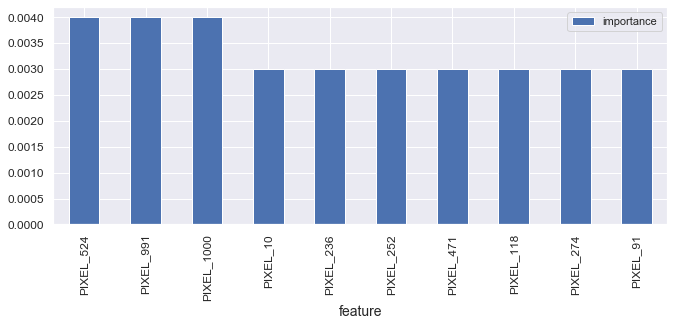

In [17]:
#identifying the important features through RFC Scores

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
#importances.plot.bar();
importances.head(10).plot.bar();

In [18]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(train_x,train_y)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(train_x,train_y)

#SVM classifier
SVM_Classifier = SVC(decision_function_shape='ovo')
SVM_Classifier.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
#EVALUATING THE MODELS
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Support Vector Machine Classifier', SVM_Classifier))

for i, v in models:
    scores = cross_val_score(v, train_x,train_y, cv=10)
    accuracy = metrics.accuracy_score(train_y, v.predict(train_x))
    confusion_matrix = metrics.confusion_matrix(train_y, v.predict(train_x))
    classification = metrics.classification_report(train_y, v.predict(train_x))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
    
#    print("Classification report:" "\n", classification) 
#    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7665507281857395

Model Accuracy:
 0.8461965574680733


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.42902997256083586

Model Accuracy:
 0.9753840459004257


============================== Support Vector Machine Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9040143969786966

Model Accuracy:
 0.9666851749028318



In [20]:
#VALIDATING THE MODELS
for i, v in models:
    accuracy = metrics.accuracy_score(test_y, v.predict(test_x))
    confusion_matrix = metrics.confusion_matrix(test_y, v.predict(test_x))
    classification = metrics.classification_report(test_y, v.predict(test_x))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
#     print("Classification report:" "\n", classification) 
#     print() 


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.7469775474956822


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.45639032815198616


============================== Support Vector Machine Classifier Model Test Results ==============================

Model Accuracy:
 0.9088946459412781



In [22]:
SVM_Classifier.predict(test_x)

array([ 81, 148,  65,  61,  69,   3,   9,  86,  73, 179, 168,  94,  79,
        81, 130, 104, 134,  52, 161,  78,  11,  80,  39, 119,  23, 130,
        61, 100,  19,  48,  56,   4, 106,  73,  39, 168,  22, 130,  28,
        26,  58,  36, 117, 156,  16, 100, 164, 176, 175,  61,  61, 144,
       130, 148, 163, 181,  52,  22,  19,  73, 138, 113, 163,  49,  79,
        37, 114,   4,  38,  79,  45, 130, 161, 176,  84, 179, 119,  48,
       170,  59,  58, 146, 130,  73, 162,   9, 134,  59,  98,  24,  31,
       157,  59,  75,  73,  61,  76, 109, 160, 112,  48, 130,  50,  82,
       181, 111,  58,  38,  18, 180,  31, 177,  41,   6,   2,  18,  44,
       118,  98, 105,  19, 134,  37,  67,  75, 119, 107, 126, 168,  23,
       138, 183, 100,  16, 178, 146,   3, 114, 103, 117, 166, 104,  37,
        86,  43,  10, 130,  37,  75,  54, 116, 171,   8,  60,  66,  22,
       149, 149, 171,   6,  28,  16, 126, 176, 104, 141,  37, 173, 177,
        20,  97, 168,  93, 134, 168, 154,  40, 162, 116,  49, 12

In [23]:
test_y

array([ 81, 148,  65,  61,  69,   3,   9,  87,  73, 179, 168,  94,  79,
        81, 130, 104, 122,  52, 161,  78,  11,  80,  39, 119,  23, 150,
        61, 100,  19,  48,  56,   4, 106,  73,  39, 168,  22, 130,  28,
        26,  58,  36, 117, 156,  16, 100, 164, 176, 175,  61,  61, 144,
       130, 148, 163, 181,  52,  22,  19,  73, 138, 113, 163,  49,  79,
        37, 114,   4,  38,  79,  45, 150, 161, 176,  84, 179, 119,  48,
       170,  59,  58, 146, 130,  73, 162,   9, 134,  59,  98,  24,  31,
       157,  59,  75,  73,  61,  76, 109, 160, 112,  48, 130,  50,  82,
       181, 111,  58,  38,  18, 180,  32, 177,  80,   6,   2,  18,  44,
       118,  98, 105,  19, 134,  37,  65,  75, 119, 107, 126, 168,  23,
       138, 183, 100,  16, 178, 157,   3, 114, 103, 117, 166, 104,  37,
        85,  43,  10, 130,  44,  75,  54, 116, 171,   8,  60,  66,  22,
       149, 149, 171,   6,  28,  16, 126, 176, 104, 141,  37,  96, 177,
        19,  97, 168,  93, 134,  80, 154,  40, 153, 116,  49, 12

In [24]:
train_labels = train.label.unique()
test_labels = test.label.unique()

In [26]:
import pickle
pkl_filename = "naive_bayes.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(BNB_Classifier, file)
    
pkl_filename = "DTC.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(DTC_Classifier, file)

pkl_filename = "SVM.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(SVM_Classifier, file)


In [36]:
li=[]
for i in range(0,184) :
    li.append(i)

#print(list(encoder.inverse_transform(li)))
li=list(encoder.inverse_transform(li))

In [55]:
cols=['encoded_label','label']
labeldf= pd.DataFrame(columns=cols)
for index,species in enumerate(li):
#     print(index,species)
    labeldf=labeldf.append({'encoded_label':index,'label':species},ignore_index=True)


In [57]:
labeldf.to_csv("labels.csv")